# Exploring NLTK

NLTK is a leading platform for building Python programs to work with human language data.

In [39]:
import nltk

#### Tokenization is the process by which big quantity of text is divided into smaller parts called tokens.

###### word_tokenize() - split a sentence into words

The output of word tokenization can be converted to Data Frame for better text understanding in machine learning applications.

In [40]:
sen = "This is the first IRS lab. We are learning NLTK in IRS lab"
tokens = nltk.word_tokenize(sen)
print(tokens)

['This', 'is', 'the', 'first', 'IRS', 'lab', '.', 'We', 'are', 'learning', 'NLTK', 'in', 'IRS', 'lab']


###### Sub-module available for the above is sent_tokenize (Sentence tokenization)

In [41]:
text = "Today is Thursady! Have a good day."
print(nltk.sent_tokenize(text))

['Today is Thursady!', 'Have a good day.']


### Parts of speech Tagging is responsible for reading the text in a language and assigning some specific token (Parts of Speech) to each word.

In [42]:
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('IRS', 'NNP'),
 ('lab', 'NN'),
 ('.', '.'),
 ('We', 'PRP'),
 ('are', 'VBP'),
 ('learning', 'VBG'),
 ('NLTK', 'NNP'),
 ('in', 'IN'),
 ('IRS', 'NNP'),
 ('lab', 'NN')]


_From the above example-_

DT	determiner

VBZ	verb, present tense with 3rd person singular (bases)

JJ	adjective (large)

NN	noun, singular (cat, tree)

NNP	proper noun, singular (sarah)

#### Chunking is used to add more structure to the sentence by following parts of speech (POS) tagging. 

In chunking, there is maximum one level between roots and leaves while deep parsing comprises of more than one level.
The primary usage of chunking is to make a group of "noun phrases." The parts of speech are combined with regular expressions.

In [43]:
from nltk import pos_tag
from nltk import RegexpParser

text = "NLTK is a leading platform for building Python programs to work with human language data.".split()
print("After Split:",text)

print()
tokens_tag = pos_tag(text)
print("After Token:",tokens_tag)

After Split: ['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data.']

After Token: [('NLTK', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('leading', 'VBG'), ('platform', 'NN'), ('for', 'IN'), ('building', 'VBG'), ('Python', 'NNP'), ('programs', 'NNS'), ('to', 'TO'), ('work', 'VB'), ('with', 'IN'), ('human', 'JJ'), ('language', 'NN'), ('data.', 'NN')]


Name of symbol	Description

.	Any character except new line

*Match 0 or more repetitions

?	Match 0 or 1 repetitions

In [44]:
patterns= """mychunk:{<NN.?>*<VBD.?>*<JJ.?>*<CC>?}"""
chunker = RegexpParser(patterns)
print("After Regex:",chunker)

output = chunker.parse(tokens_tag)
print("After Chunking",output)

print()
output.draw()

After Regex: chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?>*<VBD.?>*<JJ.?>*<CC>?'>
After Chunking (S
  (mychunk NLTK/NNP)
  is/VBZ
  a/DT
  leading/VBG
  (mychunk platform/NN)
  for/IN
  building/VBG
  (mychunk Python/NNP programs/NNS)
  to/TO
  work/VB
  with/IN
  (mychunk human/JJ)
  (mychunk language/NN data./NN))



![title](img/1.png)

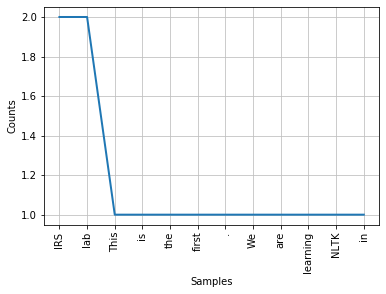

In [45]:
fd = nltk.FreqDist(tokens)
fd.plot()

# Exploring scikit-learn

Simple and efficient tools for predictive data analysis

Built on NumPy, SciPy, and matplotlib

In [46]:
from sklearn import svm,datasets,metrics

In [47]:
X,y = datasets.load_iris(return_X_y= True)
X_train = X[range(1,150,1),:]
y_train = y[range(1,150,1)]

X_test = X[range(0,150,2),:]
y_test = y[range(0,150,2)]

classifier = svm.LinearSVC().fit(X_train,y_train)

prediction = classifier.predict(X_test)
print("Prediction :- \n",prediction)

print("\nAccuracy score :-\n",metrics.accuracy_score(y_test, prediction, normalize= True))

print("\nClassification report :- \n",metrics.classification_report(y_test, prediction))

print("\nConfusion Matrix :-\n",metrics.confusion_matrix(y_test,prediction))

Prediction :- 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]

Accuracy score :-
 0.9733333333333334

Classification report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.92      0.96        25
           2       0.93      1.00      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75


Confusion Matrix :-
 [[25  0  0]
 [ 0 23  2]
 [ 0  0 25]]


C:\Users\labdh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


ref links
https://www.guru99.com/pos-tagging-chunking-nltk.html

https://www.geeksforgeeks.org/python-nltk-nltk-tokenizer-word_tokenize/#:~:text=With%20the%20help%20of%20nltk.tokenize.word_tokenize%20%28%29%20method%2C%20we,one%20or%20two%20syllables.%20Syntax%20%3A%20tokenize.word_tokenize%20%28%29

https://www.datasciencelearner.com/nltk-sent_tokenize-in-python-solution/#:~:text=Nltk%20sent_tokenize%20tokenize%20the%20sentence%20into%20the%20list.,sent_tokenize%20with%20an%20example.%20nltk%20sent_tokenize%20stepwise%20Implementation-



# Write a small program that will accept a sentence from the user, and provide a number of words, and a list of words as the output. Assume that the words are separated by blank space.

##### 1. word tokenization without NLTK

Enter the sentenceHow much wood would a woodchuck chuck if a woodchuck could chuck wood? He would chuck, he would, as much as he could, and chuck as much wood as a woodchuck would if a woodchuck could chuck wood.

The different sentences in a list are: 	 ['How much wood would a woodchuck chuck if a woodchuck could chuck wood', ' He would chuck', ' he would', ' as much as he could', ' and chuck as much wood as a woodchuck would if a woodchuck could chuck wood', '']

The list of words from the various sentences are:
 ['How', 'much', 'wood', 'would', 'a', 'woodchuck', 'chuck', 'if', 'a', 'woodchuck', 'could', 'chuck', 'wood', 'He', 'would', 'chuck', 'he', 'would', 'as', 'much', 'as', 'he', 'could', 'and', 'chuck', 'as', 'much', 'wood', 'as', 'a', 'woodchuck', 'would', 'if', 'a', 'woodchuck', 'could', 'chuck', 'wood']

-------------------------------------------------------------------------------------------------------------
{'How': 1, 'much': 3, 'wood': 4, 'would': 4, 'a': 4, 'woodchuck

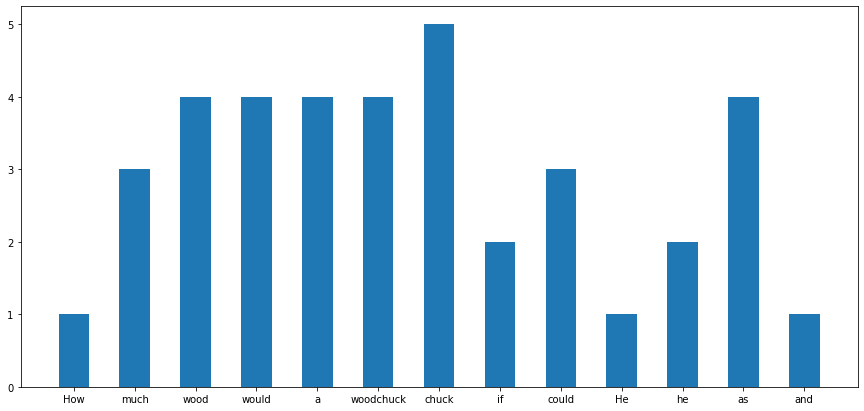


-------------------------------------------------------------------------------------------------------------
Word list after sorting alphabetically
 ['a', 'a', 'a', 'a', 'and', 'as', 'as', 'as', 'as', 'chuck', 'chuck', 'chuck', 'chuck', 'chuck', 'could', 'could', 'could', 'he', 'he', 'he', 'how', 'if', 'if', 'much', 'much', 'much', 'wood', 'wood', 'wood', 'wood', 'woodchuck', 'woodchuck', 'woodchuck', 'woodchuck', 'would', 'would', 'would', 'would']

-------------------------------------------------------------------------------------------------------------


In [69]:
import re
from matplotlib import pyplot as plt

def freqDistribution(sen):
    #sentence tokenization without NLTK
    sen = re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>?]', sen)
    print("\nThe different sentences in a list are: \t", sen)
    print()

    #word tokenization without NLTK
    wordsList = []
    for sentence in sen:
        temp = sentence.split()
        for w in temp:
            wordsList.append(w)

    print("The list of words from the various sentences are:\n", wordsList)
    print("\n-------------------------------------------------------------------------------------------------------------")
    
    #frequency of each word
    temp = []
    wordFreq = {}

    for word in wordsList:
        if word not in temp:
            temp.append(word)

    for i in range(0, len(temp)):
        wordFreq.update({temp[i]:wordsList.count(temp[i])})

    print(wordFreq)
    print()
    fig = plt.figure(figsize =(15, 7))
    plt.bar(wordFreq.keys(), wordFreq.values(), width=.5)
    plt.show()
    print("\n-------------------------------------------------------------------------------------------------------------")
    
    #to sort in alphabetical order
    words = []
    for w in wordsList:
        words.append(w.lower())

    words.sort()
    print("Word list after sorting alphabetically\n",words)
    print("\n-------------------------------------------------------------------------------------------------------------")

    
#main
sen = input("Enter the sentence")
freqDistribution(sen)

How much wood would a woodchuck chuck
if a woodchuck could chuck wood?
He would chuck, he would, as much as he could,
and chuck as much wood as a woodchuck would
if a woodchuck could chuck wood.